In [64]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.arima_model 

# 1. Link

In [2]:
# get the link file
df_link = pd.read_csv('dataSets/training/links_table_3.csv')
df_link

link_id  length  width  lanes   in_top  out_top  lane_width
0       100      58      3      1      105      111           3
1       101      84      3      1      116      121           3
2       102     131      9      3      115      109           3
3       103      23     12      4      111  122,116           3
4       104     293      9      3      109      112           3
5       105      78      6      2      NaN      100           3
6       106      15      3      1      121      113           3
7       107      34      9      3      123      108           3
8       108      40      9      3      107  119,120           3
9       109     135      9      3      102      104           3
10      110     109      9      3      NaN      123           3
11      111     121     12      4  100,112      103           3
12      112     199      9      3      104      111           3
13      113     144      6      2      106      NaN           3
14      114     198      3      1      119      118           3
15      115     107      9      3      NaN      102           3
16      116     180      9      3  118,103      101           3
17      117     136      3      1      120      NaN           3
18      118     206      9      3      114  116,122           3
19      119       9      3      1      108      114           3
20      120       6      3      1      108      117           3
21      121     118      3      1      101      106           3
22      122     197      3      1  118,103      NaN           3
23      123      59      9      3      110      107           3

# 2. Route

In [3]:
# get the route file
df_routes = pd.read_csv('dataSets/training/routes_table_4.csv')
df_routes

intersection_id  tollgate_id  \
0               A            2   
1               A            3   
2               B            1   
3               B            3   
4               C            1   
5               C            3   

                                          link_seq  
0                          110,123,107,108,120,117  
1                  110,123,107,108,119,114,118,122  
2              105,100,111,103,116,101,121,106,113  
3                              105,100,111,103,122  
4  115,102,109,104,112,111,103,116,101,121,106,113  
5                  115,102,109,104,112,111,103,122

# 3. Trajectories

In [4]:
# get the df_trajectories file
df_trajectories = pd.read_csv('dataSets/training/trajectories_table_5_training.csv')
# extract the travel sequence for routes
df_travel_seq = pd.DataFrame(df_trajectories.iloc[:,4].str.replace(';','#').str.split('#'))
df_trajectories

intersection_id  tollgate_id  vehicle_id        starting_time  \
0                    B            3     1065642  2016-07-19 00:14:24   
1                    B            3     1047198  2016-07-19 00:35:56   
2                    B            1     1086390  2016-07-19 00:37:15   
3                    A            2     1071181  2016-07-19 00:37:59   
4                    B            1     1065807  2016-07-19 00:56:21   
5                    C            3     1072812  2016-07-19 00:56:31   
6                    B            1     1014648  2016-07-19 01:26:03   
7                    A            2     1063919  2016-07-19 01:36:04   
8                    A            3     1064408  2016-07-19 01:36:20   
9                    C            1     1056529  2016-07-19 01:36:28   
10                   A            2     1002179  2016-07-19 01:38:48   
11                   B            3     1056879  2016-07-19 01:40:40   
12                   A            2     1004088  2016-07-19 01:42:22   
13                   C            1     1063652  2016-07-19 01:44:57   
14                   C            1     1057504  2016-07-19 01:46:36   
15                   A            2     1022331  2016-07-19 01:48:40   
16                   B            3     1053843  2016-07-19 01:48:47   
17                   A            2     1004286  2016-07-19 01:52:08   
18                   B            3     1086111  2016-07-19 02:10:44   
19                   A            2     1065328  2016-07-19 02:20:16   
20                   A            3     1054620  2016-07-19 02:36:20   
21                   A            3     1011942  2016-07-19 02:38:10   
22                   B            3     1058173  2016-07-19 02:42:15   
23                   A            2     1027642  2016-07-19 02:42:22   
24                   A            2     1005189  2016-07-19 02:42:24   
25                   B            3     1043567  2016-07-19 02:44:00   
26                   A            2     1056068  2016-07-19 02:58:39   
27                   A            3     1017831  2016-07-19 03:12:37   
28                   A            2     1055860  2016-07-19 03:27:36   
29                   A            2     1085652  2016-07-19 03:36:02   
...                ...          ...         ...                  ...   
109214               C            1     1020280  2016-10-17 22:35:53   
109215               C            3     1016880  2016-10-17 22:42:49   
109216               A            2     1045083  2016-10-17 22:45:00   
109217               A            3     1011400  2016-10-17 22:50:11   
109218               A            2     1043473  2016-10-17 22:50:23   
109219               B            3     1035615  2016-10-17 22:51:12   
109220               A            2     1027124  2016-10-17 22:56:18   
109221               C            3     1043900  2016-10-17 22:57:13   
109222               A            2     1022578  2016-10-17 23:06:06   
109223               B            3     1049127  2016-10-17 23:07:24   
109224               A            3     1042839  2016-10-17 23:08:13   
109225               A            2     1002950  2016-10-17 23:08:18   
109226               A            3     1018469  2016-10-17 23:10:45   
109227               C            1     1048639  2016-10-17 23:13:29   
109228               A            2     1000448  2016-10-17 23:14:16   
109229               A            2     1004272  2016-10-17 23:14:17   
109230               C            1     1031989  2016-10-17 23:20:17   
109231               A            2     1010568  2016-10-17 23:21:50   
109232               A            2     1037457  2016-10-17 23:22:08   
109233               A            2     1009417  2016-10-17 23:22:19   
109234               B            3     1047183  2016-10-17 23:29:43   
109235               A            2     1012726  2016-10-17 23:30:10   
109236               A            3     1004601  2016-10-17 23:30:43   
109237               A            3     1035614

# travel sequence from the trajectries

In [5]:
travel_seq = pd.DataFrame(df_travel_seq.travel_seq.tolist(), )
travel_seq

0                    1      2    3                    4      5    6   \
0       105  2016-07-19 00:14:24   9.56  100  2016-07-19 00:14:34   6.75  111   
1       105  2016-07-19 00:35:56  11.58  100  2016-07-19 00:36:08   7.44  111   
2       105  2016-07-19 00:37:15   5.26  100  2016-07-19 00:37:20   2.85  111   
3       110  2016-07-19 00:37:59  13.74  123  2016-07-19 00:38:13   4.70  107   
4       105  2016-07-19 00:56:21  16.08  100  2016-07-19 00:56:37  12.34  111   
5       115  2016-07-19 00:56:31  10.97  102  2016-07-19 00:56:42  13.42  109   
6       105  2016-07-19 01:26:03  16.85  100  2016-07-19 01:26:20   9.35  111   
7       110  2016-07-19 01:36:04  10.39  123  2016-07-19 01:36:15  10.09  107   
8       110  2016-07-19 01:36:20   8.58  123  2016-07-19 01:36:28   5.28  107   
9       115  2016-07-19 01:36:28   9.50  102  2016-07-19 01:36:37  11.62  109   
10      110  2016-07-19 01:38:48   8.25  123  2016-07-19 01:38:56   4.81  107   
11      105  2016-07-19 01:40:40  11.40  100  2016-07-19 01:40:51   6.28  111   
12      110  2016-07-19 01:42:22   8.32  123  2016-07-19 01:42:30   4.50  107   
13      115  2016-07-19 01:44:57   7.47  102  2016-07-19 01:45:04  12.71  109   
14      115  2016-07-19 01:46:36   6.77  102  2016-07-19 01:46:43   7.09  109   
15      110  2016-07-19 01:48:40   9.51  123  2016-07-19 01:48:49  36.31  107   
16      105  2016-07-19 01:48:47  34.41  100  2016-07-19 01:49:22   9.07  111   
17      110  2016-07-19 01:52:08  18.05  123  2016-07-19 01:52:26   7.92  107   
18      105  2016-07-19 02:10:44   5.17  100  2016-07-19 02:10:50   4.54  111   
19      110  2016-07-19 02:20:16  10.07  123  2016-07-19 02:20:26   4.87  107   
20      110  2016-07-19 02:36:20   7.42  123  2016-07-19 02:36:27   4.01  107   
21      110  2016-07-19 02:38:10   8.22  123  2016-07-19 02:38:18   4.80  107   
22      105  2016-07-19 02:42:15  17.66  100  2016-07-19 02:42:33  11.11  111   
23      110  2016-07-19 02:42:22   6.65  123  2016-07-19 02:42:29   3.86  107   
24      110  2016-07-19 02:42:24   7.54  123  2016-07-19 02:42:31   5.49  107   
25      105  2016-07-19 02:44:00  11.50  100  2016-07-19 02:44:11   8.55  111   
26      110  2016-07-19 02:58:39   9.42  123  2016-07-19 02:58:49   5.10  107   
27      110  2016-07-19 03:12:37   7.48  123  2016-07-19 03:12:44   4.05  107   
28      110  2016-07-19 03:27:36  11.44  123  2016-07-19 03:27:48   4.92  107   
29      110  2016-07-19 03:36:02  11.39  123  2016-07-19 03:36:13   4.43  107   
...     ...                  ...    ...  ...                  ...    ...  ...   
109214  115  2016-10-17 22:35:53  12.38  102  2016-10-17 22:36:05  10.14  109   
109215  115  2016-10-17 22:42:49   8.47  102  2016-10-17 22:42:57   9.55  109   
109216  110  2016-10-17 22:45:00  19.22  123  2016-10-17 22:45:19  10.40  107   
109217  110  2016-10-17 22:50:11  10.77  123  2016-10-17 22:50:22   4.61  107   
109218  110  2016-10-17 22:50:23   9.96  123  2016-10-17 22:50:33   5.09  107   
109219  105  2016-10-17 22:51:12   8.30  100  2016-10-17 22:51:21   4.38  111   
109220  110  2016-10-17 22:56:18   8.83  123  2016-10-17 22:56:26   5.05  107   
109221  115  2016-10-17 22:57:13   7.75  102  2016-10-17 22:57:21   9.02  109   
109222  110  2016-10-17 23:06:06  10.28  123  2016-10-17 23:06:17   4.21  107   
109223  105  2016-10-17 23:07:24   9.49  100  2016-10-17 23:07:34   6.15  111   
109224  110  2016-10-17 23:08:13   9.63  123  2016-10-17 23:08:22   5.21  107   
109225  110  2016-10-17 23:08:18  10.31  123  2016-10-17 23:08:29   5.73  107   
109226  110  2016-10-17 23:10:45   9.21  123  2016-10-17 23:10:54   4.99  107   
109227  115  2016-10-17 23:13:29   7.28  102  2016-10-17 23:13:37   9.76  109   
109228  110  2016-10-17 23:14:16  12.20  123  2016-10-17 23:14:28   6.60  107   
109229  110  2016-10-17 23:14:17  11.13  123  2016-10-17 23:14:28   5.67  107   
109230  115  2016-10-17 23:20:17   9.86  102  2016-10-17 23:20:27  10.20  109   
109231  110  2016-10-17 23:21:50  13.24 

In [6]:
# an example
df_travel_seq.iloc[0][0]

['105',
 '2016-07-19 00:14:24',
 '9.56',
 '100',
 '2016-07-19 00:14:34',
 '6.75',
 '111',
 '2016-07-19 00:14:41',
 '13.00',
 '103',
 '2016-07-19 00:14:54',
 '7.47',
 '122',
 '2016-07-19 00:15:02',
 '32.85']

# 4. Volume

In [7]:
# get the volume file
df_volume = pd.read_csv('dataSets/training/volume_table_6_training.csv')

# turns the nan to 0 (refer to Q&A)
df_volume['vehicle_type'] = df_volume['vehicle_type'].fillna(0)

df_volume

time  tollgate_id  direction  vehicle_model  has_etc  \
0       2016-09-19 23:09:25            2          0              1        0   
1       2016-09-19 23:11:53            2          0              1        0   
2       2016-09-19 23:13:54            2          0              1        0   
3       2016-09-19 23:17:48            1          0              1        1   
4       2016-09-19 23:16:07            2          0              1        0   
5       2016-09-19 23:18:20            3          0              2        0   
6       2016-09-19 23:18:33            3          0              1        0   
7       2016-09-19 23:19:16            2          0              1        0   
8       2016-09-19 23:19:34            2          0              2        0   
9       2016-09-19 23:20:04            3          0              1        0   
10      2016-09-19 23:22:09            3          0              1        0   
11      2016-09-19 23:23:41            1          0              2        0   
12      2016-09-19 23:23:56            2          0              2        0   
13      2016-09-19 23:27:21            2          0              4        1   
14      2016-09-19 23:25:41            3          0              1        0   
15      2016-09-19 23:25:38            2          0              2        0   
16      2016-09-19 23:26:03            2          0              2        0   
17      2016-09-19 23:26:32            3          0              1        0   
18      2016-09-19 23:27:04            3          0              1        0   
19      2016-09-19 23:30:21            1          0              2        0   
20      2016-09-19 23:29:45            3          0              2        0   
21      2016-09-19 23:33:07            3          0              2        0   
22      2016-09-19 23:30:45            1          0              1        0   
23      2016-09-19 23:30:59            1          0              1        1   
24      2016-09-19 23:32:36            1          0              1        0   
25      2016-09-19 23:32:29            3          0              2        0   
26      2016-09-19 23:32:49            3          0              2        0   
27      2016-09-19 23:49:50            3          0              1        0   
28      2016-09-19 23:40:42            3          0              2        0   
29      2016-09-19 23:45:00            1          0              1        0   
...                     ...          ...        ...            ...      ...   
543669  2016-10-17 18:20:23            1          1              1        0   
543670  2016-10-17 18:16:00            1          1              1        1   
543671  2016-10-17 18:16:05            1          1              1        1   
543672  2016-10-17 00:32:07            1          1              1        0   
543673  2016-10-17 19:32:31            1          1              3        0   
543674  2016-10-17 18:33:10            1          1              1        0   
543675  2016-10-17 19:34:53            1          1              1        0   
543676  2016-10-17 19:35:12            1          1              1        0   
543677  2016-10-17 19:35:37            1          1              1        0   
543678  2016-10-17 19:36:07            1          1              1        0   
543679  2016-10-17 19:36:39            1          1              1        0   
543680  2016-10-17 19:37:12            1          1              1        0   
543681  2016-10-17 19:37:43            1          1              3        0   
543682  2016-10-17 19:38:09            1          1              1        0   
543683  2016-10-17 19:38:34            1          1              1        0   
543684  2016-10-17 19:43:54            1          1              1        0   
543685  2016-10-17 19:45:22            1          1              1        0   
543686  2016-10-17 19:45:57            1          1              1        1   
543687  2016-10-17 19:48:26            1          1              1       

# 5. Weather

In [8]:
# get the weather file
df_weather = pd.read_csv('dataSets/training/weather_table_7_training_update.csv')
df_weather

date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0    2016-07-01     0    1000.4        1005.3           225.0         2.1   
1    2016-07-01     3    1000.5        1005.3           187.0         2.7   
2    2016-07-01     6     998.9        1003.7           212.0         2.9   
3    2016-07-01     9     998.7        1003.5           244.0         2.7   
4    2016-07-01    12     999.7        1004.5           222.0         1.3   
5    2016-07-01    15    1000.0        1004.8           102.0         1.6   
6    2016-07-01    18     998.8        1003.6           202.0         1.9   
7    2016-07-01    21    1000.2        1005.0           334.0         2.2   
8    2016-07-02     0    1001.6        1006.4           315.0         1.8   
9    2016-07-02     3    1002.4        1007.2            46.0         3.2   
10   2016-07-02     6    1001.3        1006.2            37.0         2.2   
11   2016-07-02     9    1001.9        1006.8           345.0         2.4   
12   2016-07-02    12    1003.6        1008.5           113.0         1.0   
13   2016-07-02    15    1002.4        1007.3           138.0         1.0   
14   2016-07-02    18    1000.9        1005.8           221.0         0.7   
15   2016-07-02    21    1000.9        1005.8        999017.0         0.1   
16   2016-07-03     0    1001.5        1006.4           220.0         1.5   
17   2016-07-03     3    1001.5        1006.4           200.0         1.6   
18   2016-07-03     6    1000.8        1005.7           207.0         1.8   
19   2016-07-03     9    1000.8        1005.7           223.0         1.1   
20   2016-07-03    12    1001.6        1006.5           137.0         0.6   
21   2016-07-03    15    1002.2        1007.1           173.0         0.4   
22   2016-07-03    18    1000.5        1005.4           330.0         0.7   
23   2016-07-03    21    1000.4        1005.3        999017.0         0.0   
24   2016-07-04     0    1000.6        1005.5           176.0         2.0   
25   2016-07-04     3    1000.5        1005.3           179.0         2.1   
26   2016-07-04     6     999.7        1004.5           160.0         1.7   
27   2016-07-04     9     998.8        1003.6           287.0         1.4   
28   2016-07-04    12    1001.1        1006.0           340.0         1.0   
29   2016-07-04    15    1001.1        1005.9           188.0         1.3   
..          ...   ...       ...           ...             ...         ...   
832  2016-10-14     6    1015.8        1020.9           359.0         1.9   
833  2016-10-14     9    1015.5        1020.6           349.0         2.0   
834  2016-10-14    12    1016.5        1021.6             1.0         1.4   
835  2016-10-14    15    1015.9        1021.0           354.0         1.8   
836  2016-10-14    18    1015.4        1020.5           202.0         1.1   
837  2016-10-14    21    1015.2        1020.3           360.0         2.3   
838  2016-10-15     0    1016.5        1021.6            35.0         2.0   
839  2016-10-15     3    1015.8        1020.9           357.0         1.1   
840  2016-10-15     6    1013.7        1018.8           334.0         1.5   
841  2016-10-15     9    1013.7        1018.8           333.0         2.2   
842  2016-10-15    12    1014.5        1019.6           344.0         0.9   
843  2016-10-15    15    1013.9        1019.0        999017.0         0.0   
844  2016-10-15    18    1012.9        1017.9           215.0         1.7   
845  2016-10-15    21    1012.8        1017.8           216.0         3.2   
846  2016-10-16     0    1013.9        1018.9           327.0         0.6   
847  2016-10-16     3    1013.9        1018.9           342.0         2.2   
848  2016-10-16     6    1011.7        1016.7           301.0         1.8   
849  2016-10-16     9    1011.7        1016.7            10.0         4.1   
850  2016-10-16    12    1013.8        1018.8           353.0         4.3   
851  2016-10-16    15    1014.7        1019.7             7.0         2.1   
852  20

# Join 1 : Trajectories - Volume

In [9]:
# natural join / overlapping of df_trajectories and df_volume on the same 'time'
df_trajectories = df_trajectories.rename(columns={"starting_time":"time"})
df_trajectories['time'] = pd.to_datetime(df_trajectories['time'], format='%Y-%m-%d %H:%M:%S')
#df_trajectories['time']+ pd.Timedelta(seconds=df_trajectories.iloc[:,5])
df_volume = df_volume.drop_duplicates(keep='last')
tmp = df_trajectories['time'] 
tmp2 = df_volume['time']
df_trajectories['time'] = df_trajectories['time']+ pd.to_timedelta(np.round(df_trajectories.iloc[:,5]),unit='s')
df_trajectories['time_record'] = df_trajectories['time']
df_trajectories['time'] = df_trajectories['time'].map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
df_volume['time'] = pd.to_datetime(df_volume['time'], format='%Y-%m-%d %H:%M').map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
df_trajectories_volume = pd.merge(df_trajectories.drop_duplicates(keep='last'), df_volume, on=['time','tollgate_id'])
df_trajectories_volume = df_trajectories_volume.drop('time', 1)
df_trajectories_volume.drop_duplicates
df_trajectories['time'] = tmp
df_trajectories_volume

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


intersection_id  tollgate_id  vehicle_id  \
0                    A            3     1046053   
1                    A            3     1046053   
2                    A            3     1046053   
3                    A            3     1046053   
4                    A            3     1046053   
5                    A            3     1046053   
6                    A            3     1046053   
7                    A            3     1046053   
8                    A            3     1046053   
9                    A            3     1046053   
10                   A            3     1046053   
11                   A            3     1046053   
12                   C            3     1040332   
13                   C            3     1040332   
14                   C            3     1040332   
15                   C            3     1040332   
16                   C            3     1040332   
17                   C            3     1040332   
18                   C            3     1040332   
19                   C            3     1040332   
20                   C            3     1040332   
21                   C            3     1040332   
22                   C            3     1040332   
23                   C            3     1040332   
24                   C            3     1040332   
25                   C            3     1040332   
26                   A            2     1013860   
27                   A            3     1018895   
28                   A            3     1018895   
29                   A            3     1018895   
...                ...          ...         ...   
295758               C            3     1016880   
295759               C            3     1016880   
295760               C            3     1016880   
295761               C            3     1016880   
295762               C            3     1016880   
295763               A            3     1011400   
295764               A            3     1011400   
295765               A            2     1043473   
295766               B            3     1035615   
295767               B            3     1035615   
295768               B            3     1035615   
295769               B            3     1035615   
295770               A            2     1027124   
295771               A            2     1027124   
295772               A            2     1022578   
295773               A            3     1042839   
295774               C            1     1048639   
295775               B            3     1047183   
295776               A            3     1004601   
295777               B            1     1003456   
295778               A            2     1051052   
295779               A            2     1051052   
295780               A            3     1003251   
295781               A            3     1003251   
295782               A            3     1003251   
295783               A            3     1003251   
295784               A            3     1041002   
295785               A            3     1041002   
295786               A            3     1017582   
295787               A            3     1017582   

                                               travel_seq  travel_time  \
0       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
1       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
2       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
3       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
4       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
5       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
6       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
7       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
8       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
9       110#2016-09-19 00:02:21#6.32;123#2016-09-19 00...        65.93   
10      110#2016-09-19 00:02:2

# Join 1: trajectories - volume Correlation

In [52]:
df_trajectories_volume_corr = df_trajectories_volume.corr
df_trajectories_volume_corr

<bound method DataFrame.corr of        intersection_id  tollgate_id  vehicle_id  \
0                    A            3     1046053   
1                    A            3     1046053   
2                    A            3     1046053   
3                    A            3     1046053   
4                    A            3     1046053   
5                    A            3     1046053   
6                    A            3     1046053   
7                    A            3     1046053   
8                    A            3     1046053   
9                    A            3     1046053   
10                   A            3     1046053   
11                   A            3     1046053   
12                   A            3     1046053   
13                   C            3     1040332   
14                   C            3     1040332   
15                   C            3     1040332   
16                   C            3     1040332   
17                   C            3     1040332   

# Join 2 : Weather - Trajectories

In [24]:
# natural join / overlapping of df_trajectories and df_weather on the same 'time'
# find the date for each trajectories
df_trajectories['time'] = pd.to_datetime(df_trajectories['time'], format='%Y-%m-%d %H:%M:%S')
date_trajectories = df_trajectories['time'].map(lambda t: t.strftime('%Y-%m-%d'))
# add the "date_trajectories" column for the data file df_trajectories
df_trajectories['date'] = date_trajectories
df_trajectories['hour'] = pd.to_datetime(df_trajectories['time'].map(lambda t: t.strftime('%H:%M'))).apply(lambda t: t.hour)
df_trajectories['time'] = df_trajectories['time'].map(lambda t: t.strftime('%H:%M'))
df_trajectories['hour']=(np.floor(df_trajectories['hour']/3)*3).astype(int)
df_weather_trajectories = pd.merge(df_weather, df_trajectories, on=['date','hour'])
df_weather_trajectories


date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0       2016-07-19     0    1000.9        1005.8           219.0         3.3   
1       2016-07-19     0    1000.9        1005.8           219.0         3.3   
2       2016-07-19     0    1000.9        1005.8           219.0         3.3   
3       2016-07-19     0    1000.9        1005.8           219.0         3.3   
4       2016-07-19     0    1000.9        1005.8           219.0         3.3   
5       2016-07-19     0    1000.9        1005.8           219.0         3.3   
6       2016-07-19     0    1000.9        1005.8           219.0         3.3   
7       2016-07-19     0    1000.9        1005.8           219.0         3.3   
8       2016-07-19     0    1000.9        1005.8           219.0         3.3   
9       2016-07-19     0    1000.9        1005.8           219.0         3.3   
10      2016-07-19     0    1000.9        1005.8           219.0         3.3   
11      2016-07-19     0    1000.9        1005.8           219.0         3.3   
12      2016-07-19     0    1000.9        1005.8           219.0         3.3   
13      2016-07-19     0    1000.9        1005.8           219.0         3.3   
14      2016-07-19     0    1000.9        1005.8           219.0         3.3   
15      2016-07-19     0    1000.9        1005.8           219.0         3.3   
16      2016-07-19     0    1000.9        1005.8           219.0         3.3   
17      2016-07-19     0    1000.9        1005.8           219.0         3.3   
18      2016-07-19     0    1000.9        1005.8           219.0         3.3   
19      2016-07-19     0    1000.9        1005.8           219.0         3.3   
20      2016-07-19     0    1000.9        1005.8           219.0         3.3   
21      2016-07-19     0    1000.9        1005.8           219.0         3.3   
22      2016-07-19     0    1000.9        1005.8           219.0         3.3   
23      2016-07-19     0    1000.9        1005.8           219.0         3.3   
24      2016-07-19     0    1000.9        1005.8           219.0         3.3   
25      2016-07-19     0    1000.9        1005.8           219.0         3.3   
26      2016-07-19     0    1000.9        1005.8           219.0         3.3   
27      2016-07-19     3    1000.5        1005.3           212.0         3.8   
28      2016-07-19     3    1000.5        1005.3           212.0         3.8   
29      2016-07-19     3    1000.5        1005.3           212.0         3.8   
...            ...   ...       ...           ...             ...         ...   
107687  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107688  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107689  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107690  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107691  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107692  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107693  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107694  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107695  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107696  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107697  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107698  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107699  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107700  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107701  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107702  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107703  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107704  2016-10-17    21    1013.9        1018.9           322.0         2.5   
107705  2016-1

# Join 2: weather - trajectories Correlation

In [25]:
df_weather_trajectories_corr = df_weather_trajectories.corr
df_weather_trajectories_corr

<bound method DataFrame.corr of               date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0       2016-07-19     0    1000.9        1005.8           219.0         3.3   
1       2016-07-19     0    1000.9        1005.8           219.0         3.3   
2       2016-07-19     0    1000.9        1005.8           219.0         3.3   
3       2016-07-19     0    1000.9        1005.8           219.0         3.3   
4       2016-07-19     0    1000.9        1005.8           219.0         3.3   
5       2016-07-19     0    1000.9        1005.8           219.0         3.3   
6       2016-07-19     0    1000.9        1005.8           219.0         3.3   
7       2016-07-19     0    1000.9        1005.8           219.0         3.3   
8       2016-07-19     0    1000.9        1005.8           219.0         3.3   
9       2016-07-19     0    1000.9        1005.8           219.0         3.3   
10      2016-07-19     0    1000.9        1005.8           219.0         3.3   
11      

# Join 3 : Weather - Volume

In [26]:
# natural join / overlapping of df_volume and df_weather on the same 'time'
# find the date for each volume
df_volume['time'] = pd.to_datetime(df_volume['time'], format='%Y-%m-%d %H:%M:%S')
date_volume = df_volume['time'].map(lambda t: t.strftime('%Y-%m-%d'))
# add the "date_volume" column for the data file df_volume
df_volume['date'] = date_volume
df_volume['hour'] = pd.to_datetime(df_volume['time'].map(lambda t: t.strftime('%H:%M'))).apply(lambda t: t.hour)
df_volume['hour']=(np.floor(df_volume['hour']/3)*3).astype(int)
df_volume['time'] = df_volume['time'].map(lambda t: t.strftime('%H:%M'))
df_weather_volume = pd.merge(df_weather, df_volume, on=['date','hour'])
df_weather_volume

date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0       2016-09-19     0    1008.2        1013.2           329.0         2.8   
1       2016-09-19     0    1008.2        1013.2           329.0         2.8   
2       2016-09-19     0    1008.2        1013.2           329.0         2.8   
3       2016-09-19     0    1008.2        1013.2           329.0         2.8   
4       2016-09-19     0    1008.2        1013.2           329.0         2.8   
5       2016-09-19     0    1008.2        1013.2           329.0         2.8   
6       2016-09-19     0    1008.2        1013.2           329.0         2.8   
7       2016-09-19     0    1008.2        1013.2           329.0         2.8   
8       2016-09-19     0    1008.2        1013.2           329.0         2.8   
9       2016-09-19     0    1008.2        1013.2           329.0         2.8   
10      2016-09-19     0    1008.2        1013.2           329.0         2.8   
11      2016-09-19     0    1008.2        1013.2           329.0         2.8   
12      2016-09-19     0    1008.2        1013.2           329.0         2.8   
13      2016-09-19     0    1008.2        1013.2           329.0         2.8   
14      2016-09-19     0    1008.2        1013.2           329.0         2.8   
15      2016-09-19     0    1008.2        1013.2           329.0         2.8   
16      2016-09-19     0    1008.2        1013.2           329.0         2.8   
17      2016-09-19     0    1008.2        1013.2           329.0         2.8   
18      2016-09-19     0    1008.2        1013.2           329.0         2.8   
19      2016-09-19     0    1008.2        1013.2           329.0         2.8   
20      2016-09-19     0    1008.2        1013.2           329.0         2.8   
21      2016-09-19     0    1008.2        1013.2           329.0         2.8   
22      2016-09-19     0    1008.2        1013.2           329.0         2.8   
23      2016-09-19     0    1008.2        1013.2           329.0         2.8   
24      2016-09-19     0    1008.2        1013.2           329.0         2.8   
25      2016-09-19     0    1008.2        1013.2           329.0         2.8   
26      2016-09-19     0    1008.2        1013.2           329.0         2.8   
27      2016-09-19     0    1008.2        1013.2           329.0         2.8   
28      2016-09-19     0    1008.2        1013.2           329.0         2.8   
29      2016-09-19     0    1008.2        1013.2           329.0         2.8   
...            ...   ...       ...           ...             ...         ...   
522429  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522430  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522431  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522432  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522433  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522434  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522435  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522436  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522437  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522438  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522439  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522440  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522441  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522442  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522443  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522444  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522445  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522446  2016-10-17    21    1013.9        1018.9           322.0         2.5   
522447  2016-1

# Join 3: weather - volume Correlation

In [28]:
df_weather_volume_corr = df_weather_volume.corr
df_weather_volume_corr

<bound method DataFrame.corr of               date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0       2016-09-19     0    1008.2        1013.2           329.0         2.8   
1       2016-09-19     0    1008.2        1013.2           329.0         2.8   
2       2016-09-19     0    1008.2        1013.2           329.0         2.8   
3       2016-09-19     0    1008.2        1013.2           329.0         2.8   
4       2016-09-19     0    1008.2        1013.2           329.0         2.8   
5       2016-09-19     0    1008.2        1013.2           329.0         2.8   
6       2016-09-19     0    1008.2        1013.2           329.0         2.8   
7       2016-09-19     0    1008.2        1013.2           329.0         2.8   
8       2016-09-19     0    1008.2        1013.2           329.0         2.8   
9       2016-09-19     0    1008.2        1013.2           329.0         2.8   
10      2016-09-19     0    1008.2        1013.2           329.0         2.8   
11      

# Save the join files in pkl format

In [12]:
df_trajectories_volume.to_pickle('trajectories_volume.pkl')
df_weather_trajectories.to_pickle('weather_trajectories.pkl')
df_weather_volume.to_pickle('weather_volume.pkl')

In [80]:

df_trajectories.iloc[:,2]
b.index = pd.Index(a)
c=statsmodels.tsa.arima_model.ARIMA(b, (2,0,2)).fit()

In [58]:
a=df_trajectories.iloc[:,3]
b=df_trajectories.iloc[:,5]
b.index = pd.Index(a)

In [59]:
b

time
2016-07-19 00:15:35     70.85
2016-07-19 00:38:25    148.79
2016-07-19 00:38:35     79.76
2016-07-19 00:38:57     58.05
2016-07-19 00:58:39    137.98
2016-07-19 00:58:25    113.54
2016-07-19 01:29:00    176.70
2016-07-19 01:37:18     74.47
2016-07-19 01:37:55     94.57
2016-07-19 01:40:03    214.87
2016-07-19 01:39:27     39.27
2016-07-19 01:42:06     86.07
2016-07-19 01:42:57     35.38
2016-07-19 01:48:07    189.77
2016-07-19 01:48:48    131.50
2016-07-19 01:50:50    130.43
2016-07-19 01:50:28    101.37
2016-07-19 01:53:15     67.41
2016-07-19 02:11:52     67.81
2016-07-19 02:20:59     42.64
2016-07-19 02:37:32     72.12
2016-07-19 02:39:33     83.10
2016-07-19 02:44:37    142.32
2016-07-19 02:42:51     29.15
2016-07-19 02:43:04     40.12
2016-07-19 02:47:13    192.77
2016-07-19 02:59:30     51.25
2016-07-19 03:14:10     93.09
2016-07-19 03:28:20     44.29
2016-07-19 03:36:42     39.55
                        ...  
2016-10-17 22:37:51    117.84
2016-10-17 22:45:58    189.38
2016-

In [84]:
#b.plot(figsize=(12,8));

print c.params

const                106.437885
ar.L1.travel_time      1.362719
ar.L2.travel_time     -0.368281
ma.L1.travel_time     -1.294914
ma.L2.travel_time      0.318891
dtype: float64


In [81]:
c.resid
stats.normaltest(c.resid)

NormaltestResult(statistic=196099.63580980714, pvalue=0.0)

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(b.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(b, lags=40, ax=ax2)

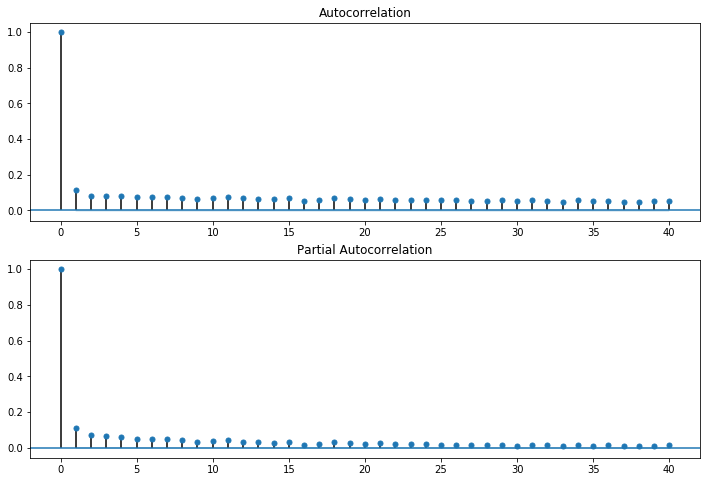

In [83]:
fig

In [85]:
c.resid

time
2016-07-19 00:15:35    -35.587885
2016-07-19 00:38:25     46.322029
2016-07-19 00:38:35    -28.367353
2016-07-19 00:38:57    -46.511914
2016-07-19 00:58:39     37.459974
2016-07-19 00:58:25      8.286177
2016-07-19 01:29:00     71.105676
2016-07-19 01:37:18    -37.058313
2016-07-19 01:37:55    -11.919483
2016-07-19 01:40:03    109.188824
2016-07-19 01:39:27    -75.876172
2016-07-19 01:42:06    -20.332488
2016-07-19 01:42:57    -70.263362
2016-07-19 01:48:07     88.916969
2016-07-19 01:48:48     21.621442
2016-07-19 01:50:50     20.277196
2016-07-19 01:50:28     -9.286968
2016-07-19 01:53:15    -41.635456
2016-07-19 02:11:52    -37.959221
2016-07-19 02:20:59    -61.240362
2016-07-19 02:37:32    -28.479536
2016-07-19 02:39:33    -17.376486
2016-07-19 02:44:37     41.668696
2016-07-19 02:42:51    -75.536678
2016-07-19 02:43:04    -58.436957
2016-07-19 02:47:13     96.801605
2016-07-19 02:59:30    -53.769949
2016-07-19 03:14:10     -6.499128
2016-07-19 03:28:20    -55.598162
2016-07-1